<a href="https://colab.research.google.com/github/kimjunwooo/python/blob/main/Fake_Bills.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import missingno as msno
from sklearn.impute import KNNImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [2]:
from google.colab import files
uploaded = files.upload()

Saving fake_bills.csv to fake_bills (1).csv


In [3]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['fake_bills.csv']), sep = ';')
# csv파일 불러오기

In [13]:
df2.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [17]:
df2.columns

Index(['is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_low',
       'margin_up', 'length'],
      dtype='object')

<Axes: >

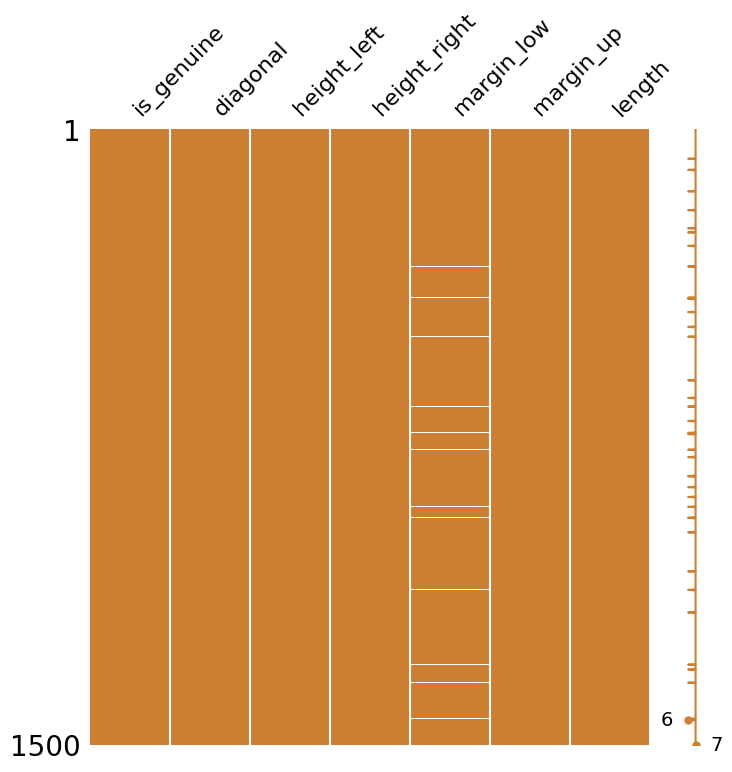

In [5]:
msno.matrix(df=df2.iloc[:, :], figsize =(8,8), color = (0.8, 0.5, 0.2))
# 흰색 선이 결측치를 나타낸다

<Axes: >

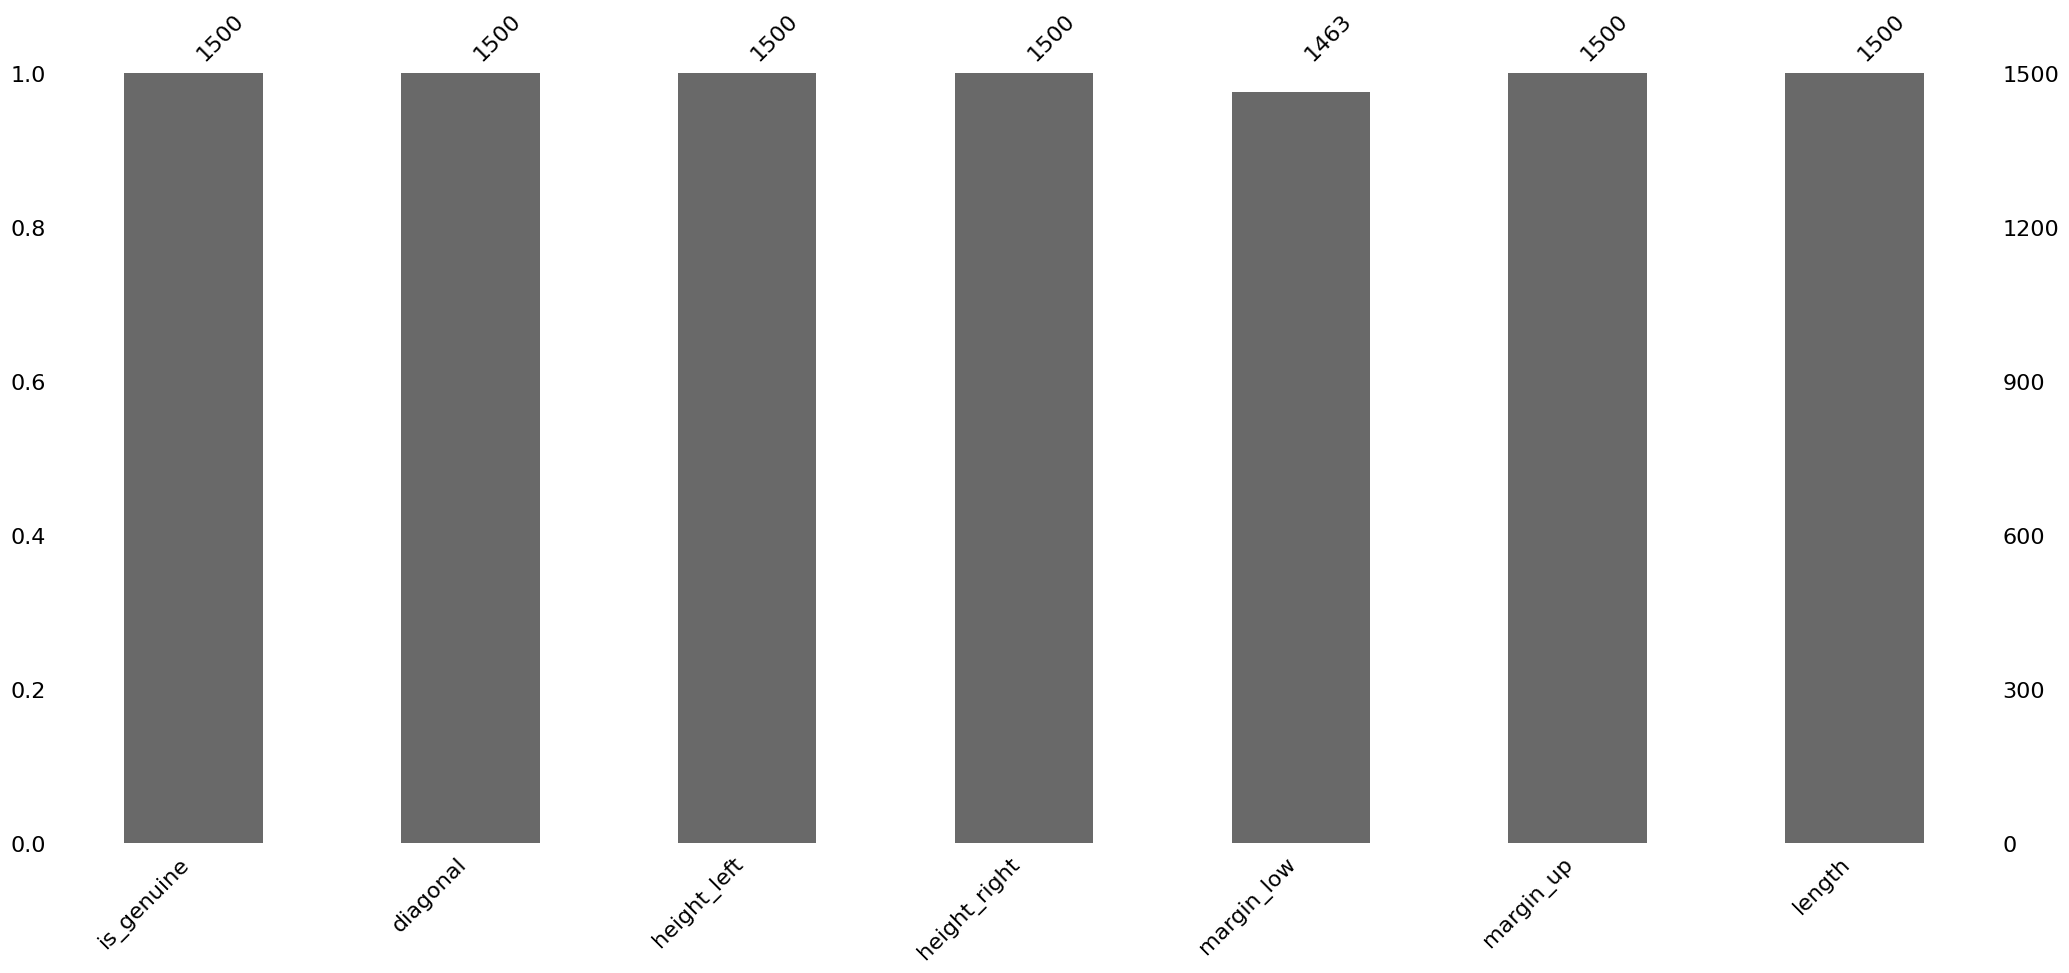

In [6]:
msno.bar(df2)
# 막대그래프로 표현하려고 했는데 유의미한 차이가 그래프에서는 나타나지 않는다...

In [18]:
imputer = KNNImputer(n_neighbors = 5)
df = imputer.fit_transform(df2)
df = pd.DataFrame(df, columns = ['is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_low',
       'margin_up', 'length'])
df
# knn을 이용하여 결측치 채우기

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1.0,171.81,104.86,104.95,4.52,2.89,112.83
1,1.0,171.46,103.36,103.66,3.77,2.99,113.09
2,1.0,172.69,104.48,103.50,4.40,2.94,113.16
3,1.0,171.36,103.91,103.94,3.62,3.01,113.51
4,1.0,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,0.0,171.75,104.38,104.17,4.42,3.09,111.28
1496,0.0,172.19,104.63,104.44,5.27,3.37,110.97
1497,0.0,171.80,104.01,104.12,5.51,3.36,111.95
1498,0.0,172.06,104.28,104.06,5.17,3.46,112.25


In [11]:
df.info()
# 결측치가 채워진것을 확인할 수 있다.
# 채워진 결측치 값은 어떻게 확인??

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1500 non-null   float64
 1   1       1500 non-null   float64
 2   2       1500 non-null   float64
 3   3       1500 non-null   float64
 4   4       1500 non-null   float64
 5   5       1500 non-null   float64
 6   6       1500 non-null   float64
dtypes: float64(7)
memory usage: 82.2 KB


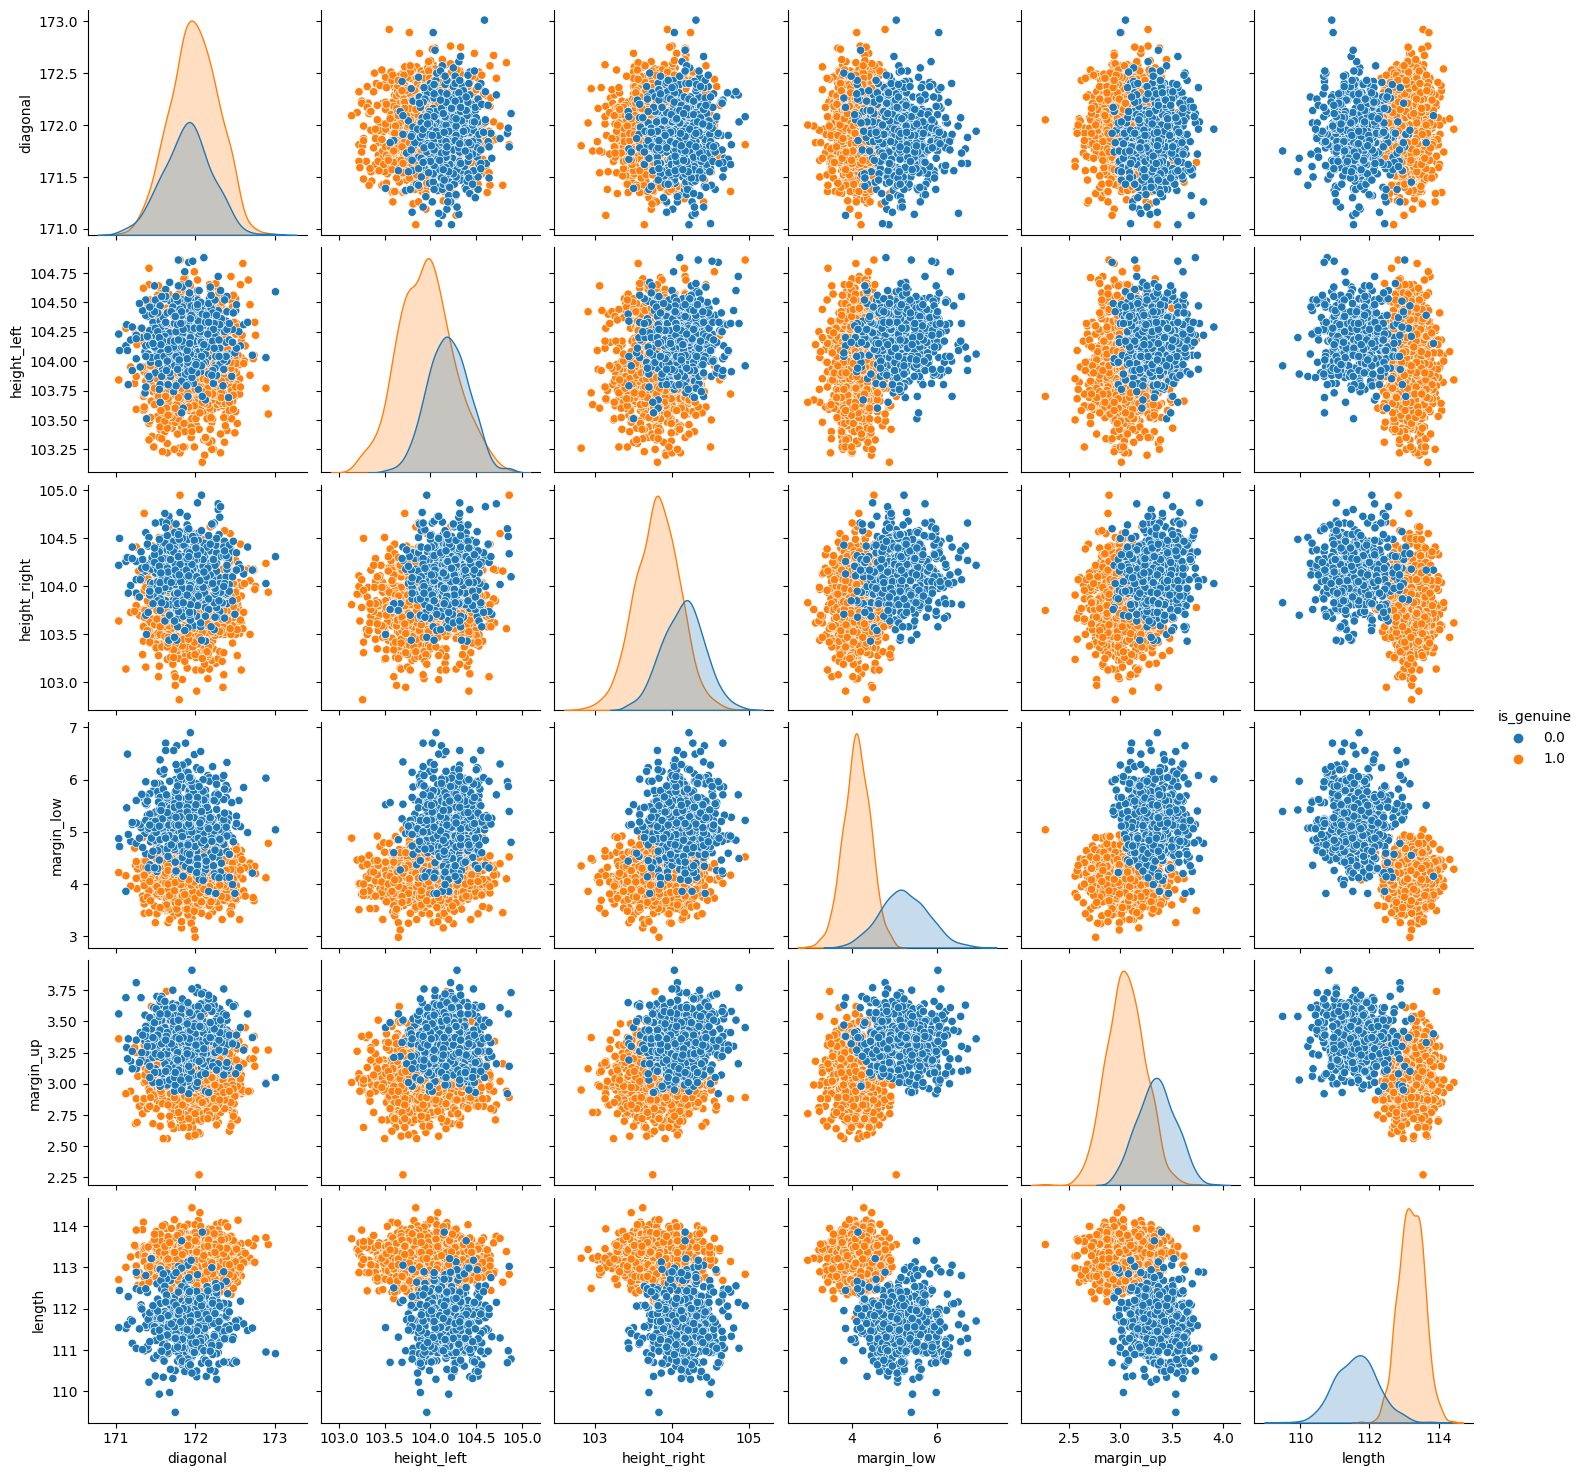

In [19]:
sns.pairplot(df, hue = 'is_genuine')
# is_genuine 값이 True,False에 따른 6개의 feature 분포이다.

In [24]:
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,1:7], df.loc[:,'is_genuine'],stratify=df['is_genuine'], random_state=0)

In [26]:
x_train.head()

,diagonal,height_left,height_right,margin_low,margin_up,length
817,172.21,103.96,103.55,3.91,2.73,113.36
373,171.65,104.29,103.81,4.26,3.05,113.58
312,172.07,104.09,103.70,4.11,3.00,113.19
370,172.10,103.99,104.02,4.19,3.21,113.12
966,171.92,104.57,104.17,4.09,2.88,113.12


In [27]:
type(y_test)

pandas.core.series.Series

In [32]:
# one-hot encoding(정답 원 핫 인코딩)
categories = df['is_genuine']
onehot_encoder = OneHotEncoder(sparse=False)
categories_array = np.array(categories).reshape(-1,1)
one_hot_encoding = onehot_encoder.fit_transform(categories_array)
print(one_hot_encoding)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [37]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [47]:
grid_params = {'n_neighbors' : list(range(1,20)), 'weights' : ["uniform", "distance"], 'metric' : ['euclidean', 'manhattan', ' minkowski']}

gs = GridSearchCV(knn, grid_params, cv = 10)
gs.fit(x_train, y_train)

print("Best Parameters : ", gs.best_params_)
print("Best Score : ", gs.best_score_)
print("Best Test Score : ", gs.score(x_test, y_test))

Best Parameters :  {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
Best Score :  0.9893331226295828
Best Test Score :  0.9973333333333333


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
380 fits failed out of a total of 1140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
380 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 213, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/

In [48]:
knn_best = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 12)
knn_best.fit(x_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=12)

In [49]:
print('Test Accuracy {}'.format(knn_best.score(x_test,y_test)))

Test Accuracy 0.9973333333333333
